# Trend and Regional Analysis – UIDAI Service Demand

## Purpose
This notebook refines insights obtained from exploratory analysis by:
- Confirming national UIDAI demand trends using stable aggregations
- Highlighting regional contrasts in service demand across states
- Interpreting trends in a policy-relevant and decision-oriented manner

Unlike exploratory analysis, this notebook avoids broad discovery and focuses
only on validating and contextualizing already identified patterns.

## Position in Analysis Pipeline
- `01_exploratory_analysis.ipynb` → Pattern discovery
- `02_trend_and_regional_analysis.ipynb` → Trend confirmation and regional contrast
- Policy documents → Evidence-based recommendations

The analysis here is intentionally minimal, structured, and non-redundant.


## Step 1: Loading the Master Analytical Table

The master analytical table consolidates enrollment, demographic updates,
and biometric updates at the state and date level.

This table is treated as the single source of truth for all trend and regional
analysis in this notebook. No raw or intermediate datasets are accessed here.


In [17]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

DATA_DIR = Path("../03_Processed_Data")
master = pd.read_csv(
    DATA_DIR / "analysis_master_table.csv",
    parse_dates=["date"]
)

master.head()

,date,state,total_enrollment,total_demographic_updates,total_biometric_updates
0,2025-03-01,Andaman And Nicobar Islands,0,1338,2703
1,2025-03-01,Andhra Pradesh,0,513040,403296
2,2025-03-01,Arunachal Pradesh,0,7809,7400
3,2025-03-01,Assam,0,202037,92931
4,2025-03-01,Bihar,0,1086699,763509


## Step 2: National Trend Confirmation Using Monthly Aggregation

Daily UIDAI service demand exhibits short-term volatility.
To confirm that observed patterns represent structural trends rather than noise,
the data is aggregated at a monthly level.

This step validates national demand behavior across services using a
stable and policy-relevant temporal resolution.

In [18]:
monthly_national = (
    master
    .assign(month=lambda df: df["date"].dt.to_period("M"))
    .groupby("month", as_index=False)
    .agg(
        total_enrollment=("total_enrollment", "sum"),
        total_demographic_updates=("total_demographic_updates", "sum"),
        total_biometric_updates=("total_biometric_updates", "sum")
    )
)

monthly_national["month"] = monthly_national["month"].astype(str)
monthly_national

,month,total_enrollment,total_demographic_updates,total_biometric_updates
0,2025-03,16582,11141194,8314997
1,2025-04,257438,1515672,8626653
2,2025-05,183616,1566287,7870160
3,2025-06,215734,1685562,7893278
4,2025-07,616868,2220715,9785768
5,2025-09,1474860,7318976,6650919
6,2025-10,817417,5008569,4580716
7,2025-11,1091316,9382527,7281897
8,2025-12,759096,9431254,8699623


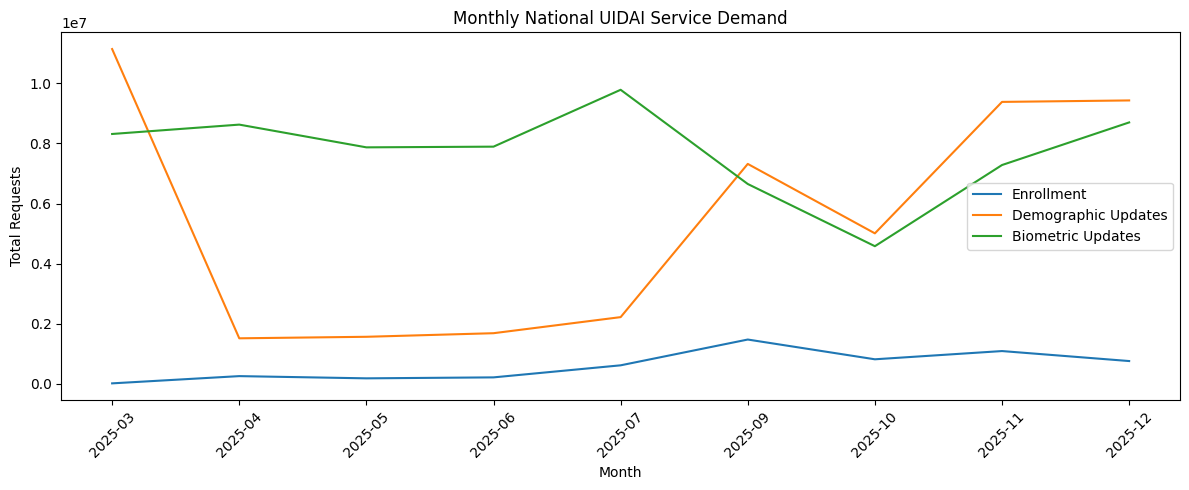

In [19]:
plt.figure(figsize=(12, 5))

plt.plot(
    monthly_national["month"],
    monthly_national["total_enrollment"],
    label="Enrollment"
)
plt.plot(
    monthly_national["month"],
    monthly_national["total_demographic_updates"],
    label="Demographic Updates"
)
plt.plot(
    monthly_national["month"],
    monthly_national["total_biometric_updates"],
    label="Biometric Updates"
)

plt.title("Monthly National UIDAI Service Demand")
plt.xlabel("Month")
plt.ylabel("Total Requests")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observation

Monthly aggregation reveals clear structural patterns in national UIDAI service demand:

- Biometric updates remain consistently high throughout the period, forming the
  largest component of UIDAI workload in most months.
- Demographic update activity shows pronounced volatility, with a sharp decline
  early in the period followed by a strong recovery toward the end of the year.
- Enrollment volumes remain comparatively low across all months, even during
  periods of elevated update activity.
- A noticeable mid-year peak is observed, driven primarily by increases in update
  services rather than new enrollments.

Overall, the monthly view confirms that national UIDAI demand is update-driven,
exhibits significant temporal variation, and is shaped more by changes in update
activity than by enrollment trends.


## Step 3: Regional Demand Contrast – High vs Low Demand States

UIDAI service demand is not uniformly distributed across states.
This step contrasts high-demand and low-demand states to highlight
regional heterogeneity in service utilization.

The objective is to reinforce policy-relevant differences rather than
re-explore state-wise distributions.

In [20]:
state_totals = (
    master
    .assign(
        total_demand=lambda df: (
            df["total_enrollment"]
            + df["total_demographic_updates"]
            + df["total_biometric_updates"]
        )
    )
    .groupby("state", as_index=False)
    .agg(total_demand=("total_demand", "sum"))
    .sort_values("total_demand", ascending=False)
)

state_totals

,state,total_demand
33,Uttar Pradesh,19138692
20,Maharashtra,14649881
4,Bihar,10321524
19,Madhya Pradesh,9330679
28,Rajasthan,7161030
30,Tamil Nadu,7131136
35,West Bengal,6772696
1,Andhra Pradesh,6137903
10,Gujarat,5301390
6,Chhattisgarh,4757391


In [21]:
top_5_states = state_totals.head(5)
bottom_5_states = state_totals.tail(5)

comparison_states = pd.concat([
    top_5_states.assign(group="High-Demand States"),
    bottom_5_states.assign(group="Low-Demand States")
])

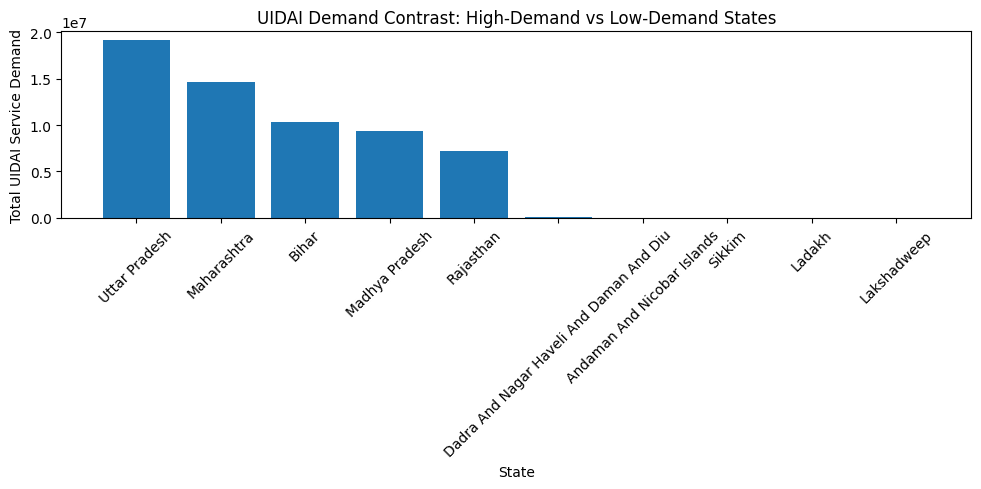

In [22]:
plt.figure(figsize=(10, 5))

plt.bar(
    comparison_states["state"],
    comparison_states["total_demand"]
)

plt.title("UIDAI Demand Contrast: High-Demand vs Low-Demand States")
plt.xlabel("State")
plt.ylabel("Total UIDAI Service Demand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observation

After correcting state labels and removing non-state entries, the high–low demand
contrast becomes clearer and more reliable:

- Uttar Pradesh and Maharashtra continue to dominate national UIDAI demand,
  contributing significantly higher volumes than all other states.
- Bihar, Madhya Pradesh, and Rajasthan form a second tier with substantial but
  noticeably lower demand levels.
- Union Territories and geographically smaller regions such as Ladakh,
  Lakshadweep, Sikkim, and Andaman & Nicobar Islands contribute only marginal
  volumes to total UIDAI service demand.
- The demand distribution is highly skewed, with a small number of large states
  accounting for the majority of national workload.

This confirms that UIDAI service demand is structurally concentrated and that
state-level demand varies by several orders of magnitude.


## Regional Insight Summary

The trend and regional analysis highlights a structurally uneven distribution of
UIDAI service demand across India.

National demand patterns are driven primarily by update-related services rather
than new enrollments, with clear temporal fluctuations observed at the monthly
level. At the regional level, a small number of populous states contribute a
disproportionate share of total UIDAI workload, while several union territories
and smaller states consistently exhibit minimal demand.

This concentration implies that uniform national resource allocation may be
inefficient. Instead, differentiated operational planning—accounting for both
regional scale and temporal variability—is necessary to ensure service quality,
capacity adequacy, and cost efficiency across the UIDAI ecosystem.

These insights form the foundation for deeper behavioral analysis and anomaly
detection in subsequent stages of the study.
